<span style="font-family:Georgia; font-size:1em;">
<b> Description </b>
<br />
<br />
This game is played on a vertical board which has seven hollow columns and six rows. Each column has a hole in the upper part of the board, where pieces are introduced. There is a window for every square, so that pieces can be seen from both sides.
<br />
<br />
In short, it´s a vertical board with 42 windows distributed in 6 rows and 7 columns.
<br />
<br />
Both players have a set of 21 thin pieces (like coins); each of them uses a different colour. The board is empty at the start of the game.
<br />
<br />
<b> Objective </b>
<br />
<br />
The aim for both players is to make a straight line of four own pieces; the line can be vertical, horizontal or diagonal.
<br />
<br />
<b>How the game goes on</b>
<br />
<br />
Before starting, players decide randomly which of them will be the beginner; moves are made alternatively, one by turn.
<br />
<br />
Moves entails in placing new pieces on the board; pieces slide downwards from upper holes, falling down to the last row or piling up on the last piece introduced in the same column. So, in every turn the introduced piece may be placed at most on seven different squares.
<br />
<br />
The winner is the first player who gets a straight line made with four own pieces and no gaps between them.
</span>
<br />
<br />
<img src="connect4.png" alt="drawing" width="200"/>

<span style="font-family:Georgia; font-size:1.2em;">
<b>Goal:</b> Given a 6x7 matrix which represents a game board, write a program to identify to classify the game state
<br />   
<br />   
<b>Deliverable:</b> Output a csv file that will contain the correct game states for N samples and upload it to Kaggle for evaluation.
</span>

In [18]:
##Load the libraries Needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

<br/>
<span style="font-family:Georgia; font-size:1.2em;">
The tool provided below allows you to visualize a matrix into a game board so it's easy to visually understand your current state
</span>
<br/>
<br/>

In [19]:
def backread(im):
    return cv2.imread(im)[:,:,::-1]

edf = pd.read_pickle("edf.pkl")
pic = backread("connect4.png")
red = backread("red.png")
yellow = backread("yellow.png")
white = backread("white.png")

def synthetic(mat):
    mpic = pic.copy()
    for i in edf.index:
        w = edf.loc[i]
        x1,y1 = w['left']
        f = w['f']
        if mat[w['x'],w['y']] == 0:    
            mpic[y1:y1+f,x1:x1+f] = white
        elif mat[w['x'],w['y']] == 1:
            mpic[y1:y1+f,x1:x1+f] = red
        elif mat[w['x'],w['y']]== 2:
            mpic[y1:y1+f,x1:x1+f] = yellow
        else:
            mpic[y1:y1+f,x1:x1+f] = 0
    return mpic
def print_board(board):
    f,ax = plt.subplots(figsize = (6,6))
    plt.imshow(synthetic(board))
    plt.show()

<br/>
<span style="font-family:Georgia; font-size:1.2em;">
For example given the board matrix below, we can use the code to convert into animation that is easier to interpret.
</span>
<br/>
<br/>

In [20]:
example0 = np.array([  [0., 0., 0., 0., 2., 0., 0.],
                       [0., 0., 0., 0., 2., 0., 0.],
                       [0., 0., 0., 2., 2., 0., 0.],
                       [0., 0., 0., 1., 2., 0., 0.],
                       [0., 0., 0., 2., 1., 1., 0.],
                       [0., 1., 0., 1., 2., 1., 1.]  ])

In [21]:
example0

array([[0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 2., 2., 0., 0.],
       [0., 0., 0., 1., 2., 0., 0.],
       [0., 0., 0., 2., 1., 1., 0.],
       [0., 1., 0., 1., 2., 1., 1.]])

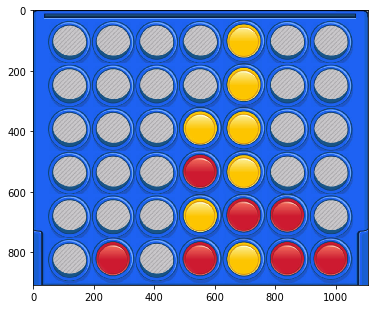

In [22]:
print_board(example0)

<span style="font-family:Georgia; font-size:2em;">
<b>Example of Different States<b/>    
</span>
<br/>
<br/>
<span style="font-family:Georgia; font-size:1.2em;">
<b>State 1: Red Wins</b>
</span>

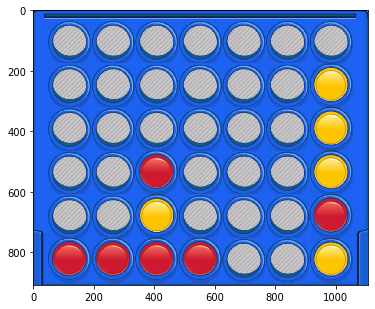

In [5]:
print_board(np.load("Examples/redwins.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
In our Game Red always starts. The game above is valid where red wins. This is One of the classes that have to be predicted at the end.
<br/>
<br/>
<b>State 2: Yellow Wins</b>
</span>

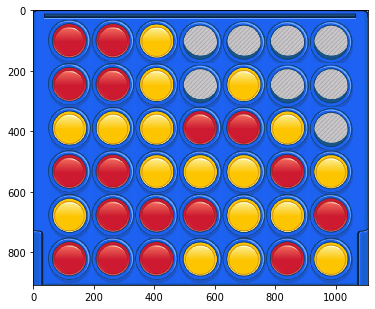

In [6]:
print_board(np.load("Examples/yellowwins.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
The state is valid because. When red starts, and given yello won (3rd column). There should be equal pieces for both classes.
<br/>
<br/>
<b>State 3: Valid Next Turn Red</b>
</span>

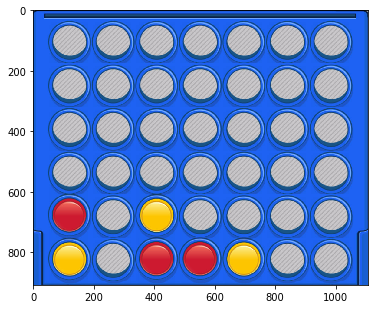

In [7]:
print_board(np.load("Examples/redisnext.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
Reason: Red Starts, equal pieces hence red goes next.
<br />
<br />    
<b>State 4: Valid Next Turn Yellow</b>
</span>

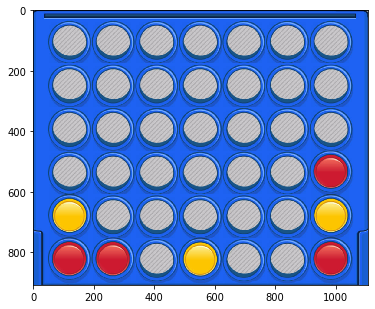

In [8]:
print_board(np.load("Examples/yellownext.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
Reason: More red pieces(4) tha Yellow(3), so the next piece is Yellow.
<br />
<br />    
<b>State 5: Invalid</b>
</span>

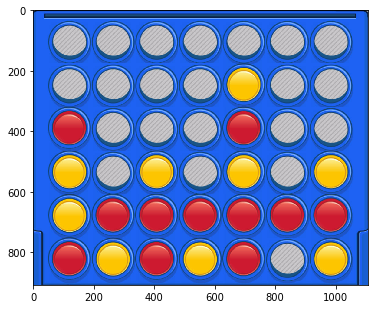

In [9]:
print_board(np.load("Examples/floating_piece.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
Reason: Floating pieces cannot exist (6th column).
</span>

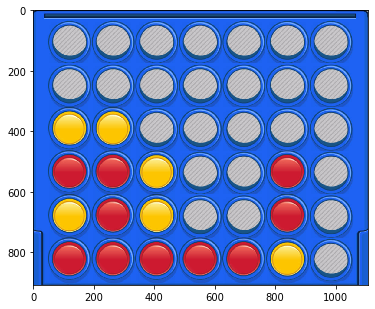

In [10]:
print_board(np.load("Examples/invalid_proportion.npy"))

<span style="font-family:Georgia; font-size:1.2em;">
Reason: Unbalanced number of pieces.
<br />    
<br />    
<b>State 6: Corrupt Data</b>
</span>

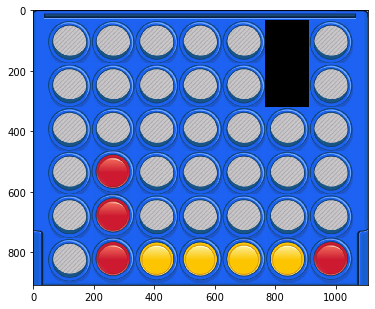

In [11]:
print_board(np.load("Examples/corrupt_.npy"))

In [12]:
np.load("Examples/corrupt_.npy")

array([[ 0.,  0.,  0.,  0.,  0., -7.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  2.,  2.,  2.,  1.]])

<span style="font-family:Georgia; font-size:1.2em;">
Reason: Values cannout be outside the range 0,1,2.
</span>

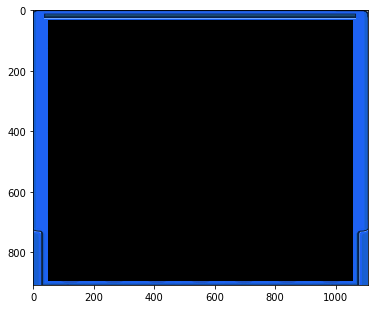

In [13]:
print_board(np.load("Examples/corrupt.npy"))

In [14]:
np.load("Examples/corrupt.npy")

array([['1.0', '0.0', '0.0', '2.0', '0.0', '0.0', '0.0'],
       ['1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0'],
       ['2.0', '0.0', '2.0', '1.0', '0.0', '2.0', 'e'],
       ['1.0', '2.0', '2.0', '2.0', '0.0', '1.0', '0.0'],
       ['2.0', '1.0', '2.0', '1.0', '0.0', '2.0', '1.0'],
       ['1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0']], dtype='<U32')

<span style="font-family:Georgia; font-size:1.2em;">
Reason: In this example because of 'j' present in column 7, it has changed the entire data type of the matrix only allowing to to hold string. A function load safe will allow us to load data and eliminiate non numeric values and replace them with 0.
</span>

In [15]:
def Load_Safe(data):
    try:
        lD = np.load(data).astype(float)
        return lD
    except:
        np.set_printoptions(precision=3, suppress=True)
        lD = np.load(data)
        for i in range(len(lD)):
            lD[i] = np.nan_to_num(np.genfromtxt(lD[i]))
        return lD.astype(float)

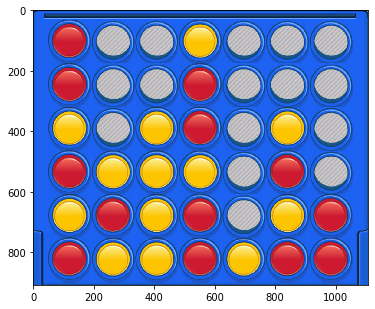

In [16]:
print_board(Load_Safe("Examples/corrupt.npy"))

In [17]:
Load_Safe("Examples/corrupt.npy")

array([[1., 0., 0., 2., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [2., 0., 2., 1., 0., 2., 0.],
       [1., 2., 2., 2., 0., 1., 0.],
       [2., 1., 2., 1., 0., 2., 1.],
       [1., 2., 2., 1., 2., 1., 1.]])